In [ ]:
import numpy as np
import h5py

Data loading from H5oina file.

In [ ]:
file_path = '/content/drive/MyDrive/Praca Magisterska/Dane/large Specimen 1 averaging test 25 frames.h5oina'

with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)

In [ ]:
print(ebsd_data[1])

[[ 64  90 111 ... 120  98  52]
 [ 83  99 119 ... 138 125  91]
 [102 112 129 ... 141 138 115]
 ...
 [146 129 106 ...  56  85 120]
 [137 134 117 ...  68  99 131]
 [136 150 145 ... 104 116 146]]


Convesion data from multiple single matrices (size of m x n) by vectorising it to one bigger D matrix whit size of s x t where s x t are szie of bigger picture of data by m x n.

In [ ]:
vectorized_matrices = ebsd_data.reshape(ebsd_data.shape[0], -1)
Matrix_D = np.stack(vectorized_matrices, axis=1)

Check for corret load of data by visualistaion.

In [ ]:
print(Matrix_D[19967])

[154 146 139 ... 110 115 112]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


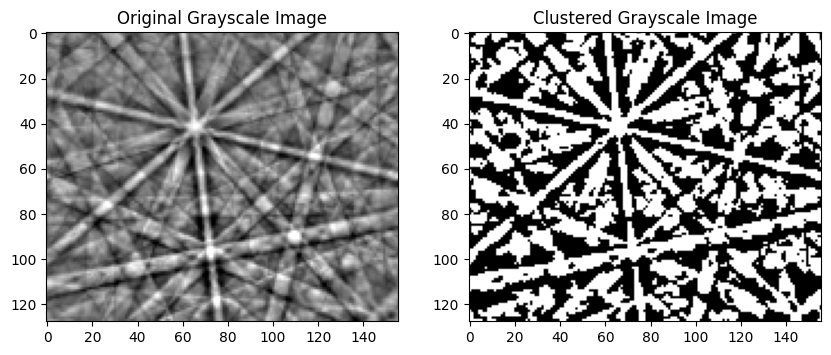

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Załóżmy, że ebsd_data[0] zawiera Twój obraz w skali szarości

# Przekształć obraz na macierz punktów
reshaped_image = ebsd_data[0].reshape((-1, 1))

# Zdefiniuj liczbę klastrów
k = 2

# Utwórz instancję modelu k-średnich
kmeans = KMeans(n_clusters=k)

# Dopasuj model do danych
kmeans.fit(reshaped_image)

# Przypisz każdy punkt do klastra
clustered_image = kmeans.cluster_centers_[kmeans.labels_]

# Przekształć obraz z powrotem do pierwotnego kształtu
clustered_image = clustered_image.reshape(ebsd_data[0].shape)

# Wyświetl obraz pierwotny i zsegmentowany
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(ebsd_data[0], cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(clustered_image, cmap='gray')
plt.title('Clustered Grayscale Image')
plt.axis('on')

plt.show()


In [1]:
import h5py
import numpy as np
from sklearn.cluster import KMeans

file_path = '/content/drive/MyDrive/Praca Magisterska/Dane/large Specimen 1 averaging test 25 frames.h5oina'

# Wczytanie danych z pliku h5
with h5py.File(file_path, 'r') as file:
    processed_patterns_dataset = file['/1/EBSD/Data/Processed Patterns']
    ebsd_data = np.array(processed_patterns_dataset)

# Przekształcenie danych do postaci jednej dużej macierzy
n_frames, width, height = ebsd_data.shape
X = ebsd_data.reshape((n_frames, width * height))

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters)

In [2]:
kmeans.fit(X)

# Etykiety obserwacji
labels = kmeans.labels_

centroids = kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


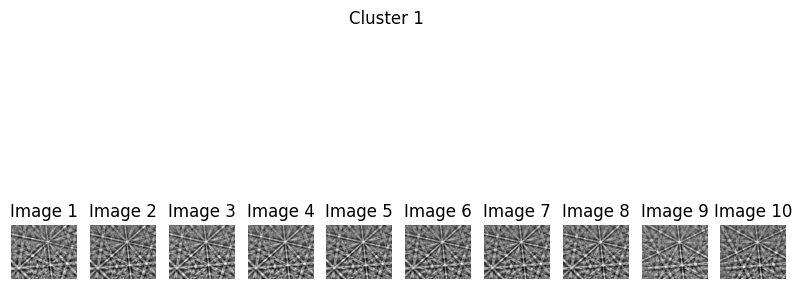

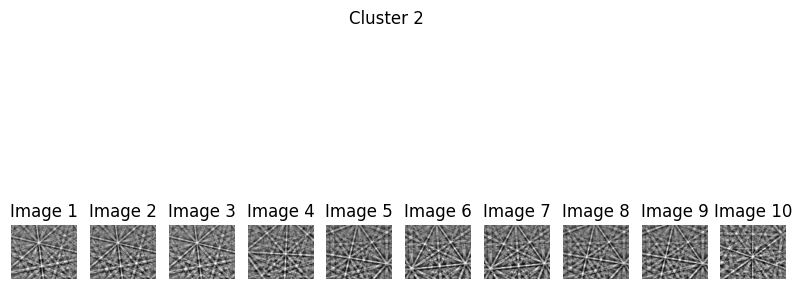

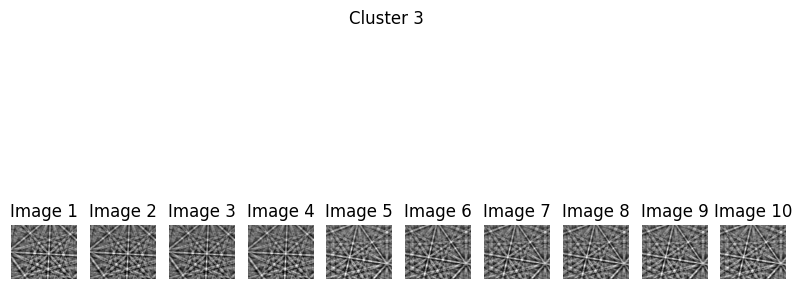

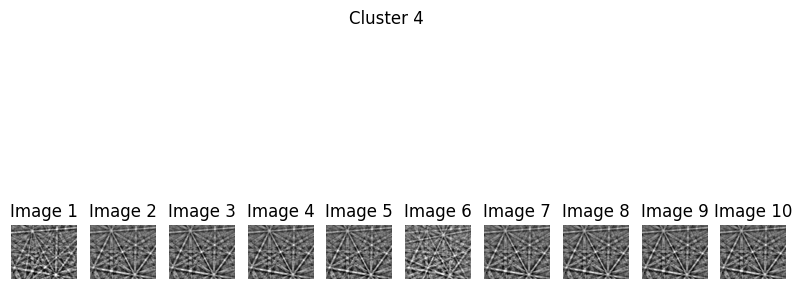

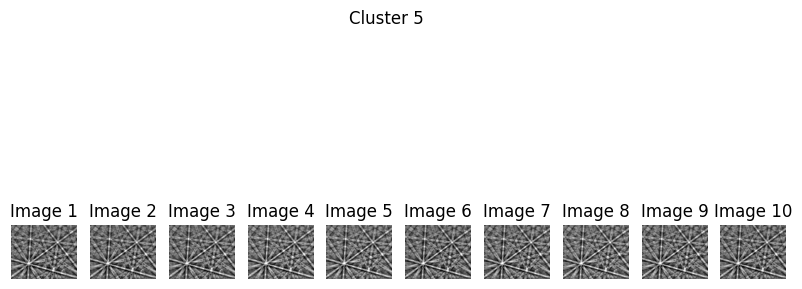

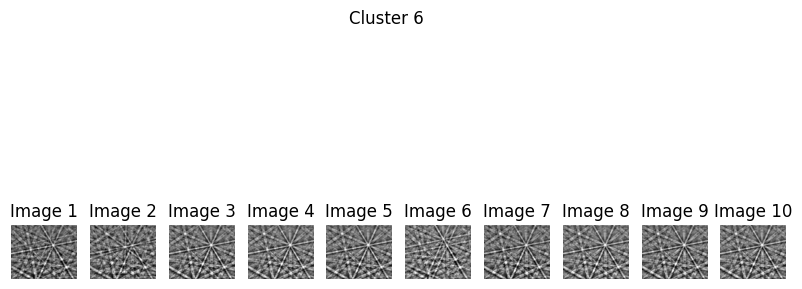

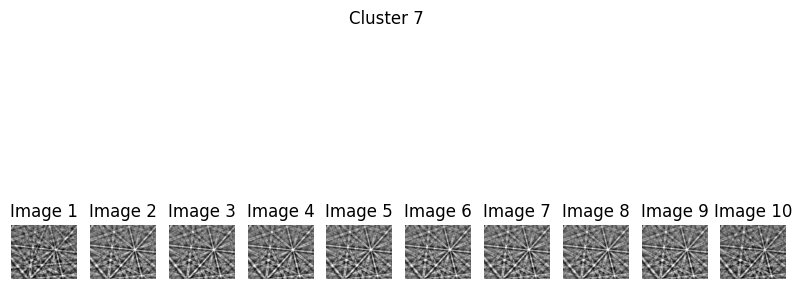

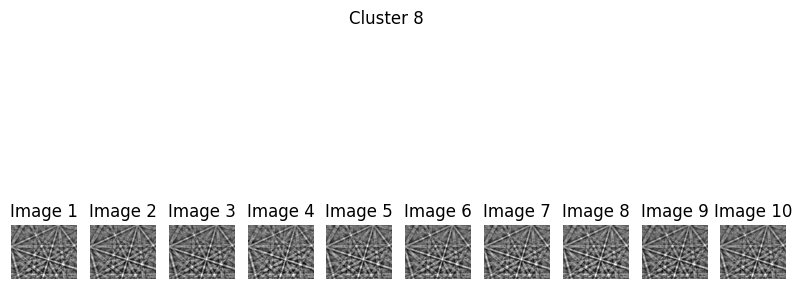

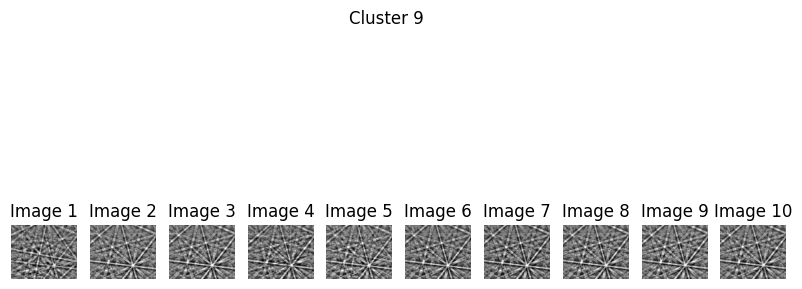

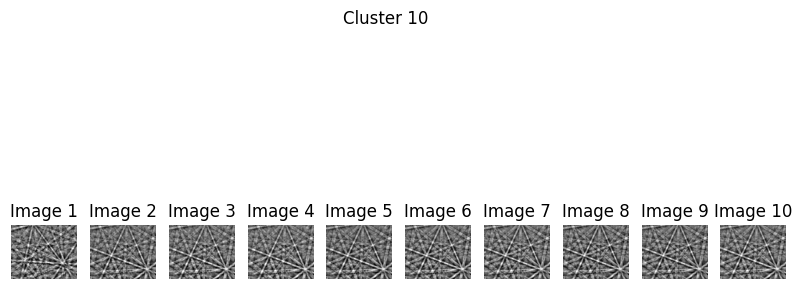

In [ ]:
import matplotlib.pyplot as plt

for i in range(n_clusters):
    cluster_images = X[labels == i]
    plt.figure(figsize=(10, 5))
    for j, image in enumerate(cluster_images[:10]):
        image_reshaped = image.reshape((width, height)).astype(np.uint8)
        plt.subplot(1, 10, j+1)
        plt.imshow(image_reshaped, cmap='gray')
        plt.title(f"Image {j+1}")
        plt.axis('off')
    plt.suptitle(f"Cluster {i+1}")
    plt.show()
